## **Project : 다음 분기에 어떤 게임을 설계해야 할까?**



*   **파일 불러오기**



In [5]:
from google.colab import files
uploaded=files.upload()

Saving vgames2.csv to vgames2.csv


In [1]:
import pandas as pd
df=pd.read_csv('/content/vgames2.csv')



*   **결측치** **확인**


In [2]:
pd.DataFrame(df.isnull().sum(),columns=['결측치 개수'])

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0




*   **결측치 처리**


In [3]:
df.fillna(0,inplace=True)



*   **데이터 확인**

In [4]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# **1. 지역에 따라서 선호하는 게임 장르가 다를까?**



*  **concat으로 데이터프레임 만들기**

> 데이터프레임- sg(Sales_Genre)




In [5]:
sg=pd.concat([df['Genre'],df['NA_Sales'],df['EU_Sales'],df['JP_Sales'],df['Other_Sales']],axis=1)
sg

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0,0,0
1,Action,0.17,0,0,0.01
2,Adventure,0,0,0.02,0
3,Misc,0.04,0,0,0
4,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0,0.01
16594,Action,0.01,0,0,0
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03




*   **sg의 출고량의 합 구하기**



>  Sales 컬럼에 K,M 처리하기


> Genre가 결측치라서 0으로 대체했던 열은 삭제하고 진행






In [6]:
sg['NA_Sales']=sg['NA_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(float)
sg['EU_Sales']=sg['EU_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(float)
sg['JP_Sales']=sg['JP_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(float)
sg['Other_Sales']=sg['Other_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(float)
sg

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [7]:
sg1=sg.groupby(['Genre']).sum()
sg1=sg1[1:]
sg1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,21650853.16,7210514.95,1440156.46,1340185.11
Adventure,760104.90,190063.86,80051.87,280016.53
Fighting,1360221.84,1420099.80,1340086.00,500036.14
Misc,4300403.75,2820209.54,420104.85,460073.58
Platform,5220441.22,7620193.99,790129.86,520051.01
Puzzle,430122.92,410050.32,56.87,50012.47
Racing,11950345.24,2040235.06,280056.12,420076.68
Role-Playing,1600317.94,1610181.97,11780333.17,1620055.34
Shooter,12490569.43,6230306.82,60038.22,740101.91




*   **가설검정**



> 카이제곱


In [8]:
from scipy.stats import chi2_contingency
chi2 = chi2_contingency(sg1)
chi2

(69505722.8936712,
 0.0,
 33,
 array([[17429599.78867288,  7923060.65666706,  4567976.84486622,
          1721072.38979384],
        [  721734.36764329,   328082.41394936,   189153.27486069,
            71267.10354666],
        [ 2545136.99625927,  1156955.69866122,   667033.4951397 ,
           251317.58993981],
        [ 4407176.44787289,  2003392.31792482,  1155039.71457832,
           435183.23962396],
        [ 7794871.49878675,  3543353.86036509,  2042892.14594047,
           769698.57490768],
        [  490383.48563204,   222916.08234261,   128520.47290998,
            48422.53911537],
        [ 8092269.74562185,  3678543.67409749,  2120834.74483648,
           799064.93544418],
        [ 9149983.99969204,  4159354.15133322,  2398042.15519926,
           903508.11377548],
        [10753006.2822929 ,  4888048.03604819,  2818164.74880488,
          1061797.31285403],
        [ 3140014.99810038,  1427372.37770437,   822940.05472098,
           310058.35947428],
        [10251900.44



*   **장르별 출고량 시각화**


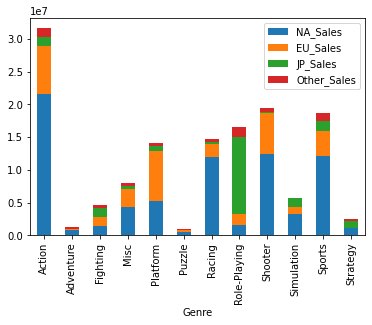

In [9]:
sg1.plot(kind = "bar", stacked = True)



*   **Rank로 출고량 순위 확인**



In [10]:
sg1.rank(ascending=False).astype(int)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,1,2,3,2
Adventure,11,11,10,10
Fighting,9,8,4,6
Misc,6,5,8,7
Platform,5,1,7,5
Puzzle,12,10,12,12
Racing,4,6,9,8
Role-Playing,8,7,1,1
Shooter,2,3,11,4


# **2. 연도별 게임의 트렌드가 있을까**



*  **데이터프레임 생성**



In [11]:
yg=pd.concat([sg,df['Year'],df['Name'],df['Platform'],df['Publisher']],axis=1)
yg

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Name,Platform,Publisher
0,Action,0.04,0.00,0.00,0.00,2008.0,Candace Kane's Candy Factory,DS,Destineer
1,Action,0.17,0.00,0.00,0.01,2009.0,The Munchables,Wii,Namco Bandai Games
2,Adventure,0.00,0.00,0.02,0.00,2010.0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Alchemist
3,Misc,0.04,0.00,0.00,0.00,2010.0,Deal or No Deal: Special Edition,DS,Zoo Games
4,Platform,0.12,0.09,0.00,0.04,2010.0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,D3Publisher
...,...,...,...,...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01,2006.0,Ice Age 2: The Meltdown,GC,Vivendi Games
16594,Action,0.01,0.00,0.00,0.00,2005.0,Rainbow Islands: Revolution,PSP,Rising Star Games
16595,Sports,0.44,0.19,0.03,0.13,2015.0,NBA 2K16,PS3,Take-Two Interactive
16596,Action,0.05,0.05,0.25,0.03,2013.0,Toukiden: The Age of Demons,PSV,Tecmo Koei




> **Year 값 중 n,nn(n=숫자)형태의 데이터를 연도형태로 정리**


In [12]:
yg['Year'] = yg['Year'].apply(float)
yg['Year'] = yg['Year'].apply(int)
yg['Year'] = yg['Year'].apply(str)


for i in range(len(yg.Year)):
    if len(yg.Year.iloc[i]) == 1:
        yg.Year.iloc[i] = '200' + yg.Year.iloc[i]

for i in range(len(yg.Year)):
    if len(yg.Year.iloc[i]) == 2:
        if yg.Year.iloc[i] == '10' or yg.Year.iloc[i] == '11' or yg.Year.iloc[i] == '12' or yg.Year.iloc[i] == '13' or yg.Year.iloc[i] == '14' or yg.Year.iloc[i] == '15' or yg.Year.iloc[i] == '16':
            yg.Year.iloc[i] = '20' + yg.Year.iloc[i]
        else:
            yg.Year.iloc[i] = '19' + yg.Year.iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [112]:
yg.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Name,Platform,Publisher
0,Action,0.04,0.00,0.00,0.00,2008,Candace Kane's Candy Factory,DS,Destineer
1,Action,0.17,0.00,0.00,0.01,2009,The Munchables,Wii,Namco Bandai Games
2,Adventure,0.00,0.00,0.02,0.00,2010,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Alchemist
3,Misc,0.04,0.00,0.00,0.00,2010,Deal or No Deal: Special Edition,DS,Zoo Games
4,Platform,0.12,0.09,0.00,0.04,2010,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,D3Publisher


In [72]:
jh= yg.groupby(['Year','Genre']).size().reset_index(name='Size')
jh.head()

,Year,Genre,Size
0,1980,0,1
1,1980,Action,1
2,1980,Fighting,1
3,1980,Misc,4
4,1980,Shooter,2


In [114]:
jh1 = jh.sort_values(by=['Size'], ascending=False).drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)
jh2=jh1.sort_values(by=['Year'], ascending=True).reset_index(drop = True)
jh2.head()

,Year,Genre,Size
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


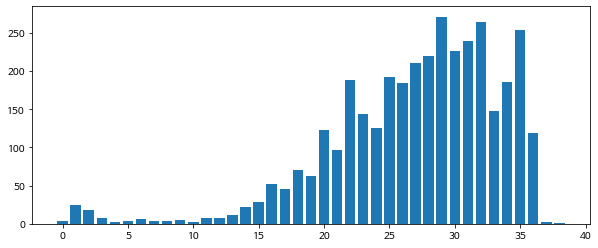

In [98]:
plt.bar(jh2.index, jh2.Size)
plt.show()



*   **연도기준 지역별 출고량의 합계**


In [15]:
ns=yg.groupby(['Year']).sum()
ns.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,110001.85,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


In [16]:
import numpy as np 
import matplotlib.pyplot as plt 



> 연도 묶어주기


In [17]:
ns1=ns.iloc[0:6]
ns1['80~85']=ns1.sum(axis=1)
ns2=ns.iloc[6:11]
ns2['86~90']=ns2.sum(axis=1)
ns3=ns.iloc[11:16]
ns3['91~95']=ns3.sum(axis=1)
ns4=ns.iloc[16:21]
ns4['96~00']=ns4.sum(axis=1)
ns5=ns.iloc[21:26]
ns5['01~05']=ns5.sum(axis=1)
ns6=ns.iloc[26:31]
ns6['06~10']=ns6.sum(axis=1)
ns7=ns.iloc[31:36]
ns7['11~15']=ns7.sum(axis=1)
ns8=ns.iloc[36:39]
ns8['16~20']=ns8.sum(axis=1)
ns8.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Year
2016    3480138.26
2017          0.10
2020          0.58
dtype: float64

In [115]:
Year_Sales=pd.DataFrame(pd.concat([ns1['80~85'],ns2['86~90'],ns3['91~95'],ns4['96~00'],ns5['01~05'],ns6['06~10'],ns7['11~15'],ns8['16~20']],axis=1).sum())
Year_Sales

,0
80~85,570196.47
86~90,270228.54
91~95,1860319.83
96~00,33561175.73
01~05,23941938.39
06~10,38153038.76
11~15,43561805.01
16~20,1740069.47


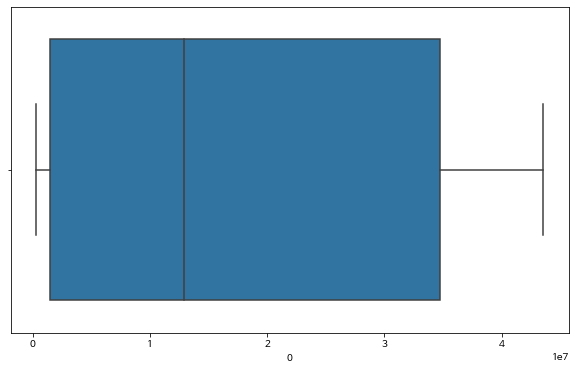

In [116]:
#CI
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x=Year_Sales[0])
plt.show()

Text(0, 0.5, 'Sales')

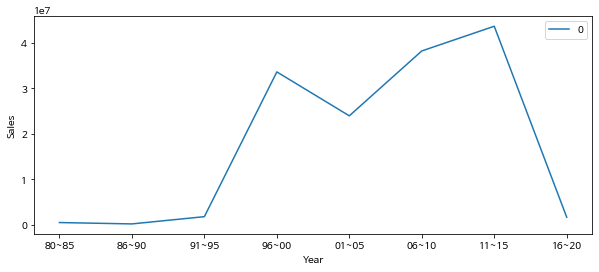

In [117]:
Year_Sales.plot()
plt.xlabel("Year")
plt.ylabel("Sales")

# **3. 출고량이 높은 게임에 대한 분석 & 시각화**



*   **Name 기준 전체 지역의 출고량으로 분석 진행**

In [118]:
#출고량이 높은 게임 상위10개
sales_high=yg.groupby(['Name']).sum()
sales_high['합계']=sales_high['NA_Sales']+sales_high['EU_Sales']+sales_high['JP_Sales']+sales_high['Other_Sales']
top10=pd.DataFrame(sales_high['합계'].nlargest(10, keep='first')) #상위10개 값 선정
top10

,합계
Name,
Grand Theft Auto V,9630046.29
Halo: Reach,7030002.84
Mario Kart 64,5550004.32
Pokemon X/Pokemon Y,5170009.18
The Legend of Zelda: Ocarina of Time,4100007.72
Pokemon FireRed/Pokemon LeafGreen,3150007.34
Pokémon Yellow: Special Pikachu Edition,3120011.52
FIFA 14,2990014.17
Super Mario Bros. 3,2930019.56


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


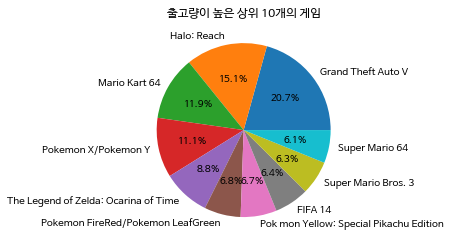

In [119]:
plt.pie(top10, labels=top10.index, autopct='%.1f%%')
plt.title('출고량이 높은 상위 10개의 게임')
plt.show()

In [25]:
#출고량이 높은 플랫폼 상위10개
sales_hp=yg.groupby(['Platform']).sum()
sales_hp['합계']=sales_hp['NA_Sales']+sales_hp['EU_Sales']+sales_hp['JP_Sales']+sales_hp['NA_Sales']
ptop10=pd.DataFrame(sales_hp['합계'].nlargest(10, keep='first')) #상위10개 값 선정
ptop10

,합계
Platform,
X360,50801444.31
N64,24700328.62
PS,19741006.70
PS2,16891629.28
PS3,15451192.77
GBA,13940483.72
Wii,13861339.29
DS,13091138.55
3DS,12120301.49




> **폰트깨짐해결**



In [47]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [23]:
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


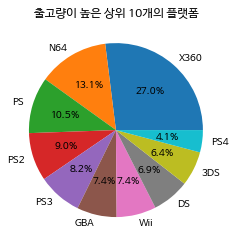

In [26]:
plt.pie(ptop10, labels=ptop10.index, autopct='%.1f%%')
plt.title('출고량이 높은 상위 10개의 플랫폼')
plt.show()


*   **PCA**
조금 더 공부 필요

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
features = yg[['NA_Sales','EU_Sales','JP_Sales','NA_Sales']]
pca = PCA(n_components=4)
#features = pd.DataFrame(scaler.fit_transform(features), columns=['NA_Sales','EU_Sales','JP_Sales','NA_Sales'])
extracted_yg = pd.DataFrame(pca.fit_transform(features), columns=['EA', 'EU','JP','NA'])
extracted_yg

,EA,EU,JP,NA
0,-6930.704179,-2091.661166,-1211.319852,1.176551e-09
1,-6930.520331,-2091.661262,-1211.319802,-1.179645e-13
2,-6930.760753,-2091.661202,-1211.299867,-1.124591e-13
3,-6930.704179,-2091.661166,-1211.319852,1.832573e-13
4,-6930.590995,-2091.571226,-1211.319528,1.422112e-13
...,...,...,...,...
16593,-6930.548594,-2091.621247,-1211.319680,-2.936549e-13
16594,-6930.746605,-2091.661144,-1211.319863,-2.936449e-13
16595,-6930.138403,-2091.471559,-1211.289081,-2.936756e-13
16596,-6930.690078,-2091.611987,-1211.069686,-2.936477e-13
